# Module 2: EDA

## Exercise 2. Exploratory Data Analysis

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean
from numpy import std

In [3]:
file_path = "/mnt/c/Users/Adriana/Desktop/ZRIVE/data/groceries/box_builder_dataset/feature_frame.csv"
data = pd.read_csv(file_path)
data.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


Since I want to get to see all the columns, I temporarily adjust the max columns displayed

In [4]:
# Temporarily adjust the max columns displayed
pd.set_option('display.max_columns', None)

data.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,vendor,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.038462,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.038462,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In this dataset, every row representes an (order, product) pair where outcome indicates whether the product was bought or not on that specific order and every other feature has been computed only looking at information prior to that order in order to avoid information leakage.

## 1. Quick checks
**Do all the quick checks and find any potential issues with the data. Fix them as you see fit.**

In [5]:
data.shape

(2880549, 27)

The dataset contains 2880549 and 27 columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

We can observe there are no missing values. Nevertheless, the data types are not what we would have expected.

Firstly, variant_id order_id, and user_id should not be integers, but strings (pandas objects).

In [7]:
data['variant_id'] = data['variant_id'].astype('object')
data['order_id'] = data['order_id'].astype('object')
data['user_id'] = data['user_id'].astype('object')

On the other hand, created_at and order_date should be dates.

In [8]:
data['created_at'] = data['created_at'].astype('datetime64[us]')
data['order_date'] = data['order_date'].astype('datetime64[us]')

Moreover, outcome is actually a binary variable, as it indicates whether the product was bought or not on that specific order.

In [9]:
data['outcome'] = data['outcome'].astype(int)

On the other hand, ordered_before, abandoned_before, active_snoozed, set_as_regular should also be integers, as they represent binary variables too.


In [10]:
data['ordered_before'] = data['ordered_before'].astype(int)
data['abandoned_before'] = data['abandoned_before'].astype(int)
data['active_snoozed'] = data['active_snoozed'].astype(int)
data['set_as_regular'] = data['set_as_regular'].astype(int)

Furthermore, count_adults, count_children, count_babies, count_pets, people_ex_babies days_since_purchase_variant_id and days_since_purchase_product_type should also be integers as they represent counts.

In [11]:
data['count_adults'] = data['count_adults'].astype('int64')
data['count_children'] = data['count_children'].astype('int64')
data['count_babies'] = data['count_babies'].astype('int64')
data['count_pets'] = data['count_pets'].astype('int64')
data['count_pets'] = data['count_pets'].astype('int64')
data['people_ex_baby'] = data['people_ex_baby'].astype('int64')


data['days_since_purchase_variant_id'] = data['days_since_purchase_variant_id'].astype('int64')
data['days_since_purchase_product_type'] = data['days_since_purchase_product_type'].astype('int64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   variant_id                        object        
 1   product_type                      object        
 2   order_id                          object        
 3   user_id                           object        
 4   created_at                        datetime64[us]
 5   order_date                        datetime64[us]
 6   user_order_seq                    int64         
 7   outcome                           int64         
 8   ordered_before                    int64         
 9   abandoned_before                  int64         
 10  active_snoozed                    int64         
 11  set_as_regular                    int64         
 12  normalised_price                  float64       
 13  discount_pct                      float64       
 14  vendor            

In [13]:
data.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,vendor,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05,3,0,0,0,0,0,0.081052,0.053512,clearspring,0.000000,2,0,0,0,2,33,42.0,31.134053,30,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05,2,0,0,0,0,0,0.081052,0.053512,clearspring,0.000000,2,0,0,0,2,33,42.0,31.134053,30,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05,4,0,0,0,0,0,0.081052,0.053512,clearspring,0.000000,2,0,0,0,2,33,42.0,31.134053,30,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06,2,0,0,0,0,0,0.081052,0.053512,clearspring,0.038462,2,0,0,0,2,33,42.0,31.134053,30,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06,3,0,0,0,0,0,0.081052,0.053512,clearspring,0.038462,2,0,0,0,2,33,42.0,31.134053,30,30.0,24.27618


## 2. Data integrity checks
Do all he data integrity checks and understand the shape of your data.

**discount_pct**

One of the things we can check is the distribution of the discount percentage, and check whereas it is between 0 and 1, as they represent percentages.

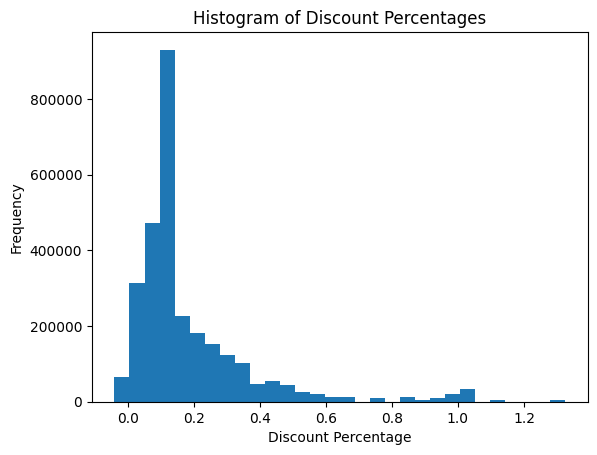

In [14]:
plt.hist(data['discount_pct'], bins=30) 
plt.title('Histogram of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

In [15]:
count_over_1 = (data['discount_pct'] > 1.0).sum()
count_total = len(data) 
print("Number of instances with discount percentage higher than 1: ", count_over_1)
print("Total number of instances: ", count_total)

Number of instances with discount percentage higher than 1:  58582
Total number of instances:  2880549


In [16]:
count_below_0 = (data['discount_pct'] < 0.0).sum()
print("Number of instances with discount percentage lower than 0: ", count_over_1)
print("Total number of instances: ", count_total)

Number of instances with discount percentage lower than 0:  58582
Total number of instances:  2880549


Values above 1.0 and below 0.0 clearly represent measurement errors. We could correct them, and replace them with the correct value but, since we do not have the knowledge of which values should have been there, I decided to remove them and keep only those instances where the discount percentage is between 0 and 1.

In [17]:
data = data[(data['discount_pct'] >= 0) & (data['discount_pct'] <= 1)]
data.shape

(2820380, 27)

**people_ex_baby**

Another aspect we can check is if people_ex_baby, which likely represents the number of all individuals except babies, consists on the sum of count_adults plus count_children.

In [18]:
inconsistent_rows = data[(data['count_adults'] + data['count_children']) != data['people_ex_baby']]
print(f"Inconsistent people counts found in {len(inconsistent_rows)} rows.")

Inconsistent people counts found in 0 rows.


We can obverve that it is consistent for all rows.

**outcome and order_date**

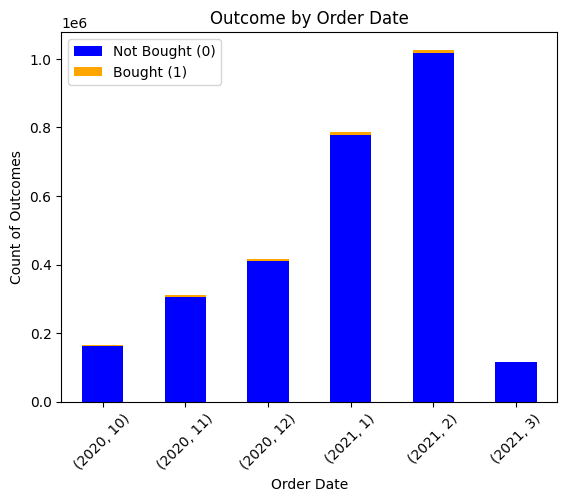

In [19]:
outcome_counts = data.groupby([data['order_date'].dt.year, data['order_date'].dt.month, data['outcome']]).size().unstack(fill_value=0)


outcome_counts.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Outcome by Order Date')
plt.xlabel('Order Date')
plt.ylabel('Count of Outcomes')
plt.xticks(rotation=45)
plt.legend(['Not Bought (0)', 'Bought (1)'])
plt.show()

Something that caught my eye is the decrease of the number of bought products in March 2021. Nevertheless, since it is the last available month in the dataset, it was probable that this low value was because the month had not been completed. Therefore, I decided to print the maximum order date to see if this hypothesis was truth:

In [20]:
print("Maximum order date: ", max(data['order_date']))

Maximum order date:  2021-03-03 00:00:00


We can observe that the maximum date is the 3rd of March of 2021, so it is reasonable that in this month there were not that many bought products, since it only accounts for the first three days of this month.

**global_popularity**

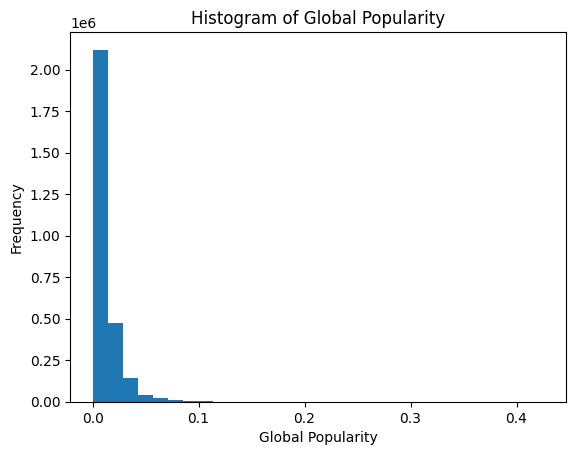

In [21]:
plt.hist(data['global_popularity'], bins=30) 
plt.title('Histogram of Global Popularity')
plt.xlabel('Global Popularity')
plt.ylabel('Frequency')
plt.show()

**avg_days_to_buy_variant_id**

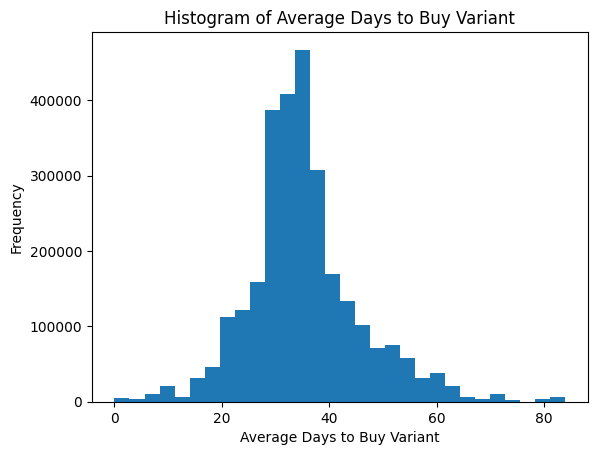

In [22]:
plt.hist(data['avg_days_to_buy_variant_id'], bins=30) 
plt.title('Histogram of Average Days to Buy Variant')
plt.xlabel('Average Days to Buy Variant')
plt.ylabel('Frequency')
plt.show()

Standard Deviation method, since we can observe the data is Gaussian-like:

In [23]:
# calculate summary statistics
data_mean, data_std = mean(data['avg_days_to_buy_variant_id']), std(data['avg_days_to_buy_variant_id'])

# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

outliers = [x for x in data['avg_days_to_buy_variant_id'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data['avg_days_to_buy_variant_id'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 32004
Non-outlier observations: 2788376


**std_days_to_buy_variant_id**

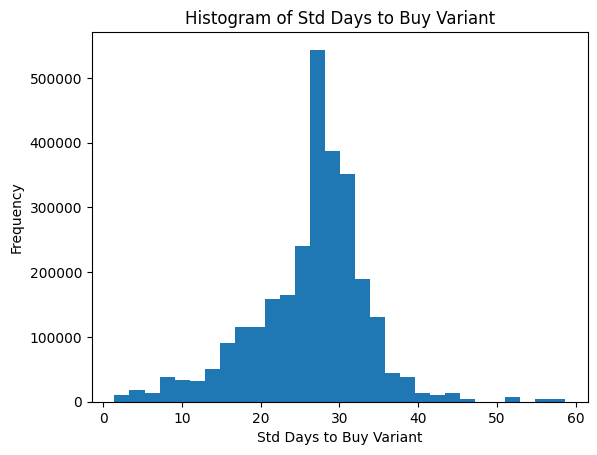

In [24]:
plt.hist(data['std_days_to_buy_variant_id'], bins=30) 
plt.title('Histogram of Std Days to Buy Variant')
plt.xlabel('Std Days to Buy Variant')
plt.ylabel('Frequency')
plt.show()

**set_as_regular**

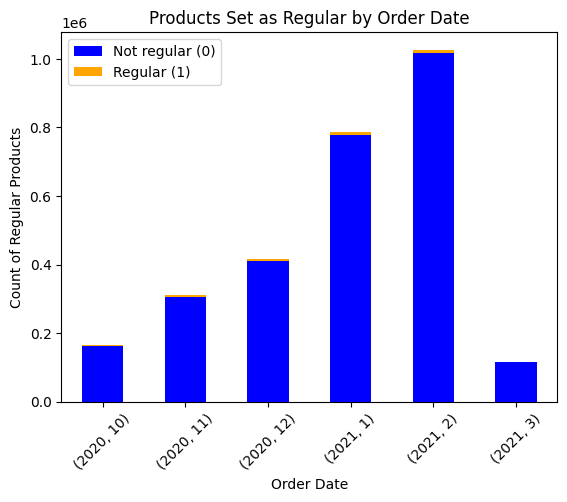

In [25]:
set_as_regular_counts = data.groupby([data['order_date'].dt.year, data['order_date'].dt.month, data['set_as_regular']]).size().unstack(fill_value=0)


outcome_counts.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Products Set as Regular by Order Date')
plt.xlabel('Order Date')
plt.ylabel('Count of Regular Products')
plt.xticks(rotation=45)
plt.legend(['Not regular (0)', 'Regular (1)'])
plt.show()

**Difference between days_since_purchase_variant_id and days_since_purchase_product_type**

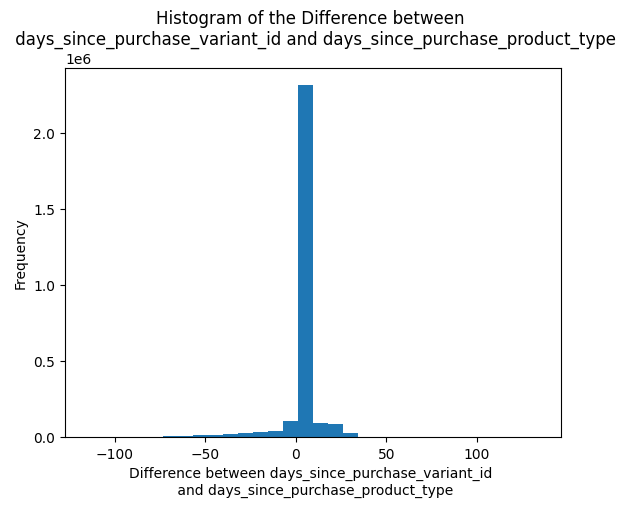

In [26]:
plt.hist(data['days_since_purchase_variant_id'] - data['days_since_purchase_product_type'], bins=30) 
plt.title('Histogram of the Difference between \n days_since_purchase_variant_id and days_since_purchase_product_type')
plt.xlabel('Difference between days_since_purchase_variant_id \n and days_since_purchase_product_type')
plt.ylabel('Frequency')
plt.show()

Probably, a difference of more than 25 or 50 would indicate an outlier. Check this with the Standard Deviation method, as the distribution is more or less a Gaussian.

In [27]:
difference = data['days_since_purchase_variant_id'] - data['days_since_purchase_product_type']

# calculate summary statistics
data_mean, data_std = mean(difference), std(difference)

# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

outliers = [x for x in difference if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in difference if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Identified outliers: 76898
Non-outlier observations: 2743482


In [28]:
count_over_25 = (abs(difference) > 25).sum()
print("Number of instances with difference higher than 25: ", count_over_1)

Number of instances with difference higher than 25:  58582


We can observe that the Standard Deviation method classifies more outliers than we had previously expected (for differences higher than 25 in absolute terms).

In [29]:
data.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,vendor,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05,3,0,0,0,0,0,0.081052,0.053512,clearspring,0.000000,2,0,0,0,2,33,42.0,31.134053,30,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05,2,0,0,0,0,0,0.081052,0.053512,clearspring,0.000000,2,0,0,0,2,33,42.0,31.134053,30,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05,4,0,0,0,0,0,0.081052,0.053512,clearspring,0.000000,2,0,0,0,2,33,42.0,31.134053,30,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06,2,0,0,0,0,0,0.081052,0.053512,clearspring,0.038462,2,0,0,0,2,33,42.0,31.134053,30,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06,3,0,0,0,0,0,0.081052,0.053512,clearspring,0.038462,2,0,0,0,2,33,42.0,31.134053,30,30.0,24.27618


In [30]:
pd.reset_option('display.max_columns')

## Analysis

In [32]:
info_cols = ['variant_id', 'order_id', 'user_id', 'created_at', 'order_date']
target_col = 'outcome'
features_cols = [col for col in data.columns if col not in info_cols + [target_col]]

categorical_cols = ['product_type', 'vendor']
binary_cols = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
numerical_cols = [col for col in data.columns if col not in categorical_cols + binary_cols]

In [33]:
data[target_col].value_counts()

outcome
0    2787951
1      32429
Name: count, dtype: int64

We can observe that the dataset is unbalanced, as most instances as labeled with '0'.

In [34]:
for col in binary_cols:
    count = data[col].value_counts().to_dict()
    mean = data.groupby(col)['outcome'].mean().to_dict()
    print(f"Value counts {col}: ", count)
    print(f"Mean {col}: ", mean)


Value counts ordered_before:  {0: 2761165, 1: 59215}
Mean ordered_before:  {0: 0.008195453730581113, 1: 0.1654986067719328}
Value counts abandoned_before:  {0: 2818669, 1: 1711}
Mean abandoned_before:  {0: 0.011069409001198793, 1: 0.7177089421391}
Value counts active_snoozed:  {0: 2814008, 1: 6372}
Mean active_snoozed:  {0: 0.011267558585476659, 1: 0.113308223477715}
Value counts set_as_regular:  {0: 2810154, 1: 10226}
Mean set_as_regular:  {0: 0.010628243149663683, 1: 0.25053784470956386}


We can observe that most products have never been ordered before. Additionally, most products have not been abandoned before and are not set as regular. 

Now, I plot the correlation matrix for the numerical variables:

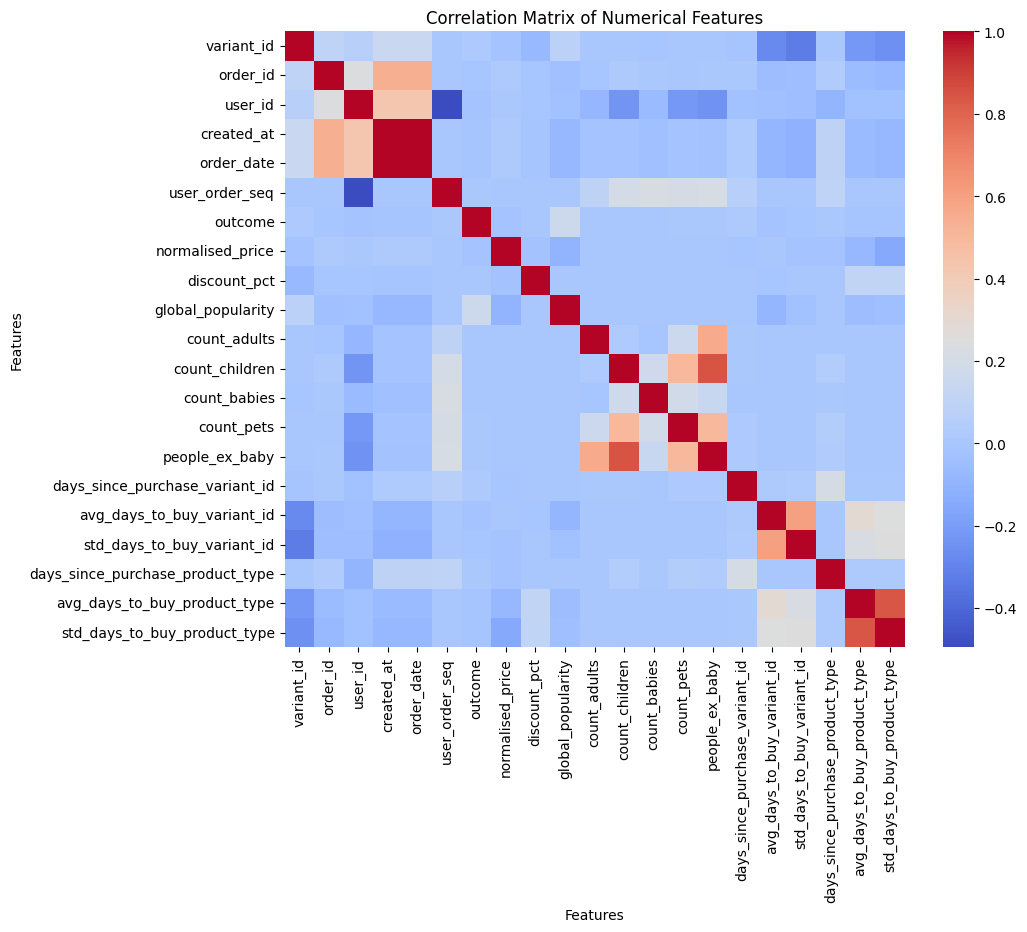

In [39]:
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True)

# Add titles and labels
plt.title('Correlation Matrix of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

One thing we can observe is that popularity and normalised_price are negatively correlated, that is, the cheaper the product is, the more popular it tends to be. Additinally, it is important to mention that most of these variables are modestly correlated.

Finally, plot the distribution of the numerical variables differenciating the outcome:

/tmp/ipykernel_176304/3564160735.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data.loc[lambda x: x.outcome == 0, col], label = '0', ax=axs[i])
/tmp/ipykernel_176304/3564160735.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data.loc[lambda x: x.outcome == 1, col], label = '1', ax=axs[i])


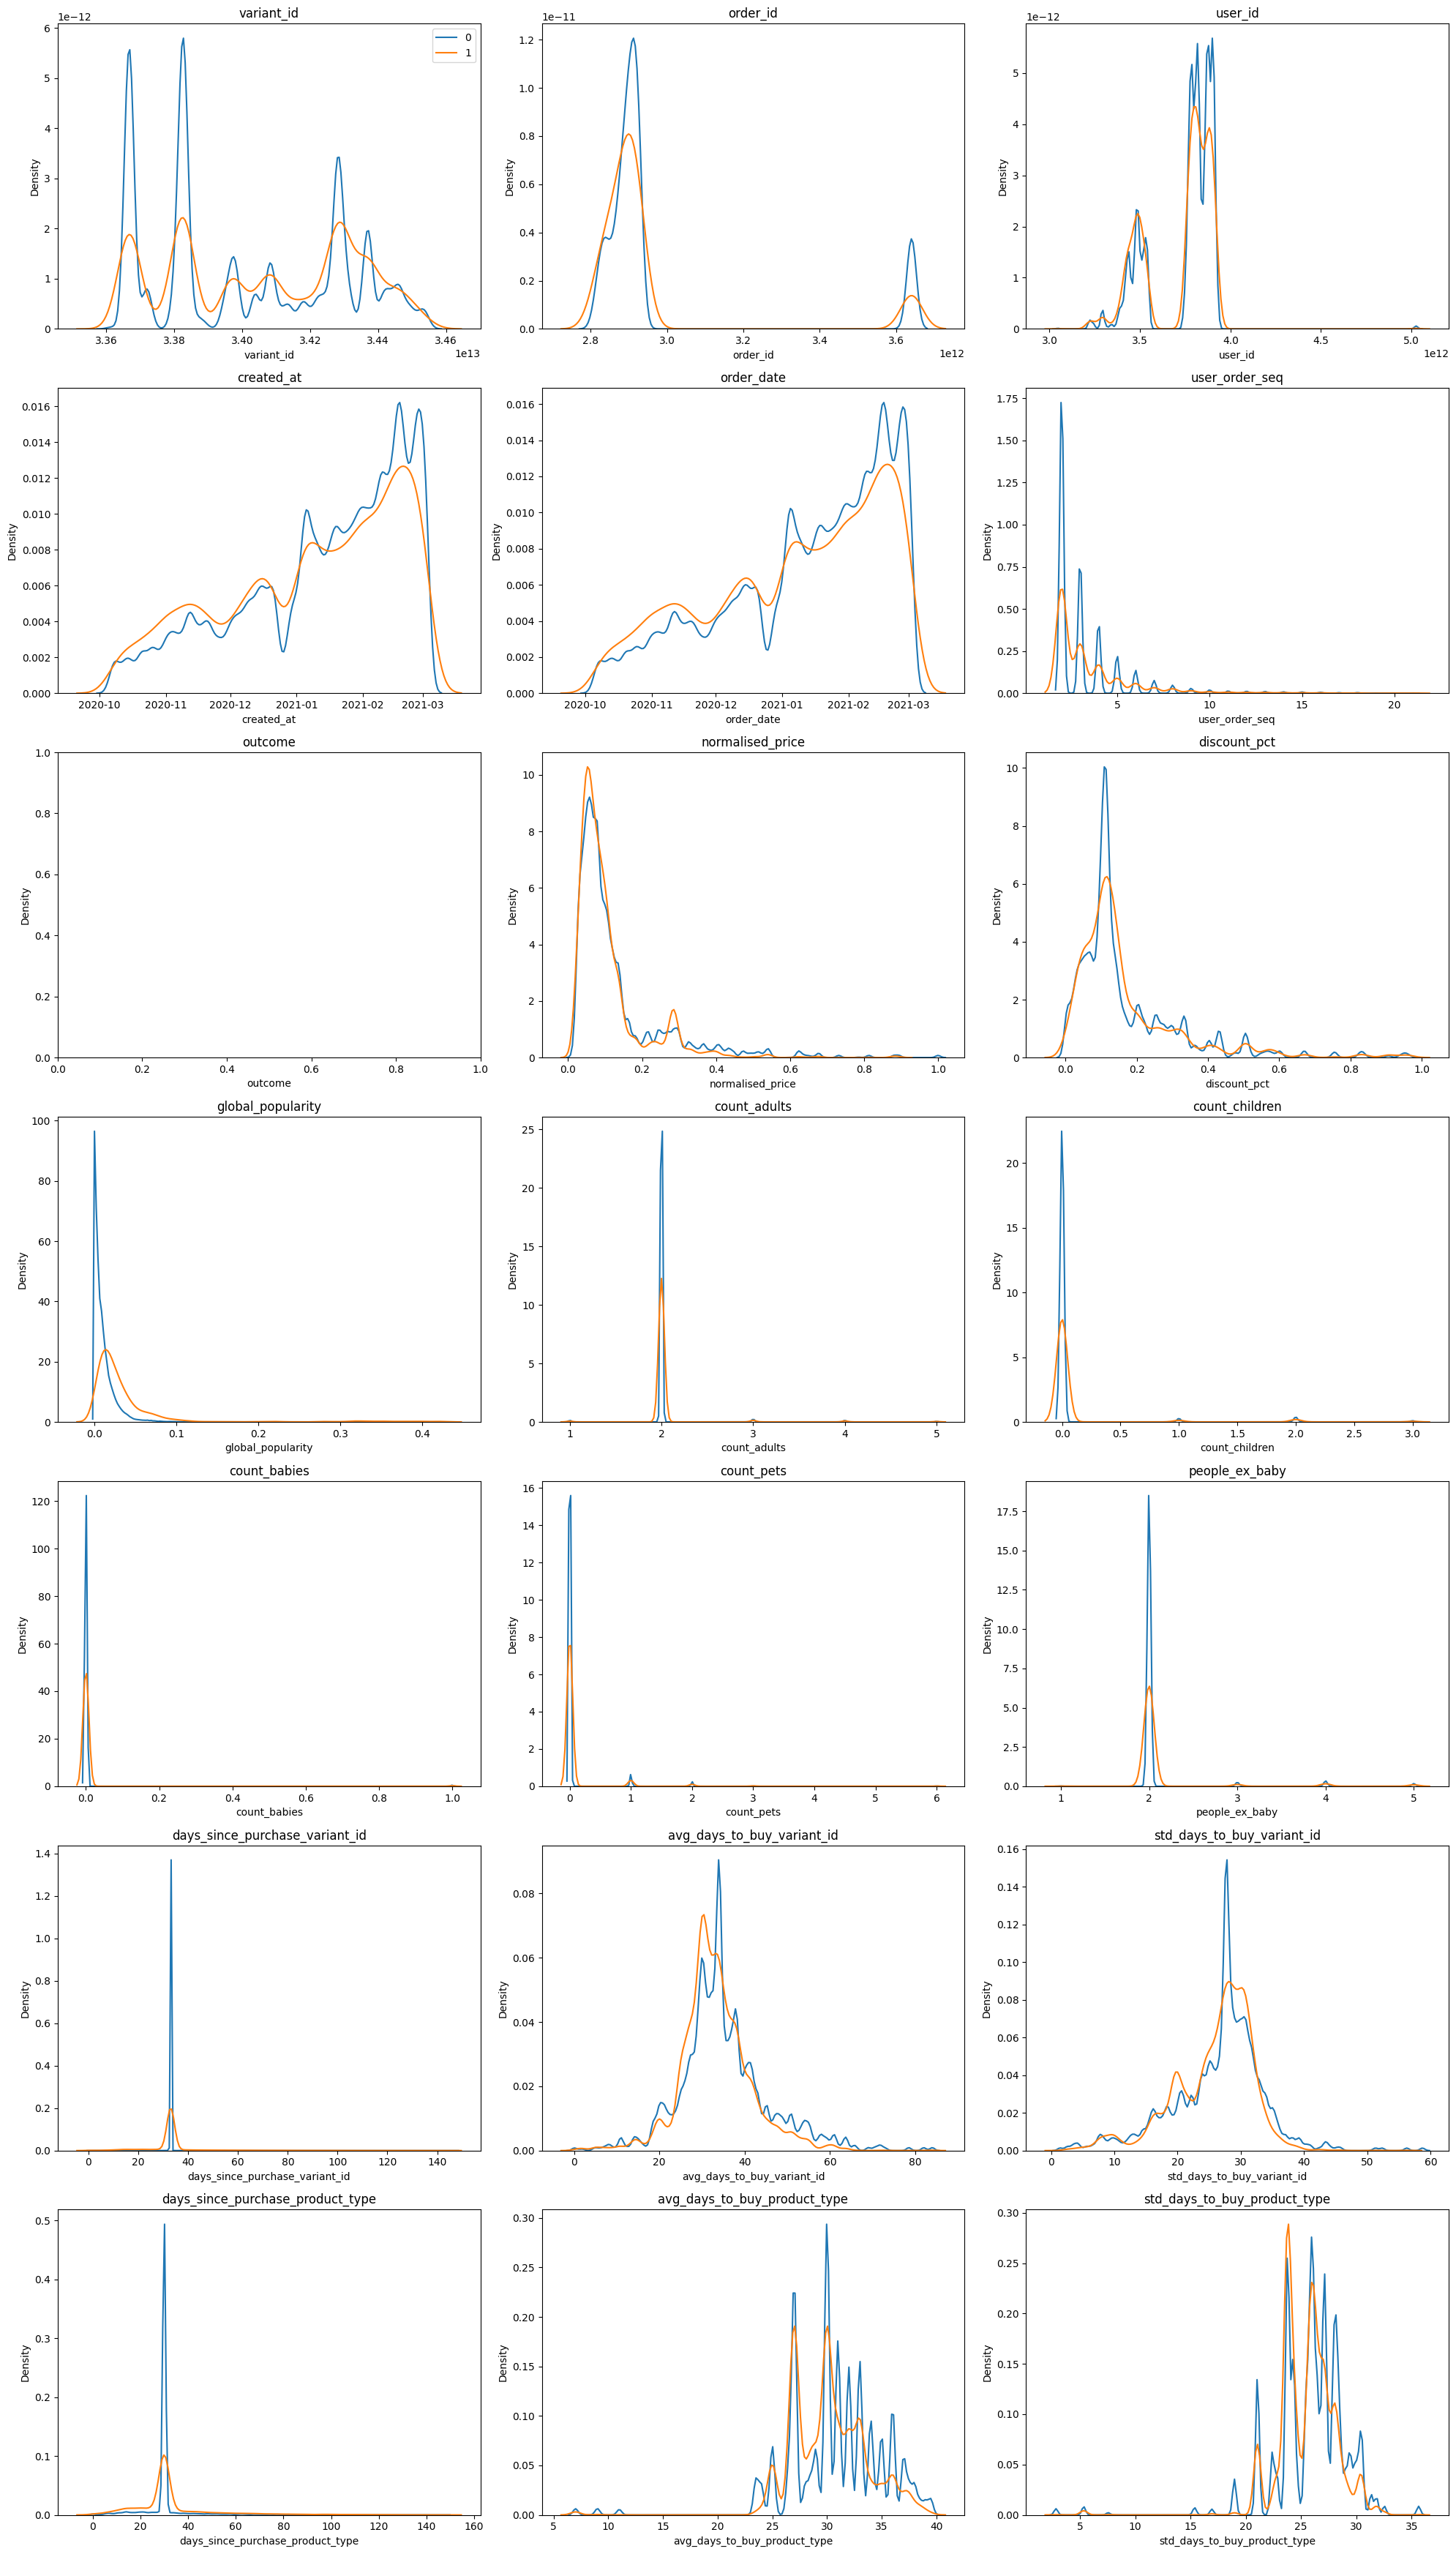

In [41]:
cols = 3
rows = int(len(numerical_cols)/cols)
fig, axs = plt.subplots(rows, cols, figsize = (20, 5*rows))
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    sns.kdeplot(data.loc[lambda x: x.outcome == 0, col], label = '0', ax=axs[i])
    sns.kdeplot(data.loc[lambda x: x.outcome == 1, col], label = '1', ax=axs[i])
    axs[i].set_title(col)

axs[0].legend()
plt.tight_layout()


In [46]:
fig.savefig('/mnt/c/Users/Adriana/Desktop/ZRIVE/zrive-ds/output/module2/density_plots')

![Density plots](/mnt/c/Users/Adriana/Desktop/ZRIVE/zrive-ds/output/module2/density_plots.png)

We can observe that, more or less, they have the same distribution. Additionally, from the global_popularity plot, we can see that, in general, more popular products are bought. Finally, it is worth mentioning that plots such as count_adults, count_children, days_since_pruchase_product_type, etc, have weird delta distributions, probably because their missing values have been imputed with the median.

Lastly, to get some information regarding the categorical variables, I use the function describe:

In [42]:
data[categorical_cols].describe()

,product_type,vendor
count,2820380,2820380
unique,62,261
top,tinspackagedfoods,biona
freq,226474,146828


We can observe that the cacategorical variables have too many unique values.